<a href="https://colab.research.google.com/github/Cobeasta/ML-MNIST/blob/master/MNIST_Analysis_Coby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


1.15.0


In [0]:
def load_data():
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train.shape

  x_train = np.array(x_train, dtype = "float32")
  x_test = np.array(x_test, dtype="float32")
  x_train = x_train / 255.0
  x_test = x_test / 255.0

  x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
  x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

  x_train.shape
  return (x_train, y_train), (x_test, y_test)

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:

def train_and_evaluate_model(iterations):
  history = model.fit(x_train, y_train, epochs=iterations, validation_data= (x_test, y_test))
  model.evaluate(x_test, y_test)

In [0]:
#Model 1
(x_train, y_train), (x_test, y_test) = load_data()

model = models.Sequential()
#initial layering
model.add(layers.Conv2D(28, (3, 3), activation='relu',input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.build(x_train.shape)
model.summary()

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_and_evaluate_model(15)
#ACCURACY 94.56%

In [0]:
#Model 2 
#Same as model 1 but uses adam optimizer
(x_train, y_train), (x_test, y_test) = load_data()

model = models.Sequential()
#initial layering
model.add(layers.Conv2D(28, (3, 3), activation='relu',input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.build(x_train.shape)
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_and_evaluate_model(15)
#ACCURACY 98.65%

In [0]:
#Model 3 - Uses sgd, playing with strides with conv2d layer
#Strides hurt the dataset.
(x_train, y_train), (x_test, y_test) = load_data()

model = models.Sequential()
#initial layering
model.add(layers.Conv2D(28, (3, 3), activation='relu',input_shape=(28,28, 1), strides=2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.build(x_train.shape)
model.summary()

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_and_evaluate_model(12)
# ACCURACY 83.15%


In [0]:
#Model 4: playing with smaller kernal size

(x_train, y_train), (x_test, y_test) = load_data()

model = models.Sequential()
#initial layering
model.add(layers.Conv2D(28, (2, 2), activation='relu',input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


#finalize set
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.build(x_train.shape)
model.summary()

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_and_evaluate_model(15)

#ACCURACY 76.59%

In [0]:
#Model 5: playing with big kernal size

(x_train, y_train), (x_test, y_test) = load_data()

model = models.Sequential()
#initial layering
model.add(layers.Conv2D(28, (4, 4), activation='relu',input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


#finalize set
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.build(x_train.shape)
model.summary()

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_and_evaluate_model(15)
#ACCURACY 85.86%

In [0]:
#Model 6
(x_train, y_train), (x_test, y_test) = load_data()

model = models.Sequential()
#initial layering
#layer to recognize lines
model.add(layers.Conv2D(28, (3, 3), activation='relu',input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(28, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

#finalize set
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.build(x_train.shape)
model.summary()

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#The loss was still decreasing so I increased the number of iterations to from 12 to 16
#The loss was still decreasing increased to 20
train_and_evaluate_model(20)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 12, 12, 28)        3164      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1008)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                64576     
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [0]:
#Model 7
#same as model 6 but with adam instead of sgd
(x_train, y_train), (x_test, y_test) = load_data()

model = models.Sequential()
#initial layering
#layer to recognize lines
model.add(layers.Conv2D(28, (3, 3), activation='relu',input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(28, (2, 2), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

#finalize set
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.build(x_train.shape)
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_and_evaluate_model(12)
#ACCURACY 98.38%

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 12, 12, 28)        3164      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1008)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                64576     
_________________________________________________________________
dense_49 (Dense)             (None, 10)              

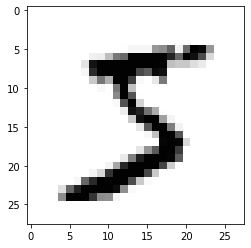

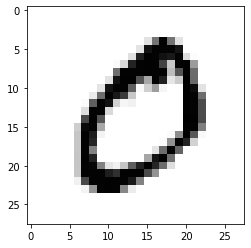

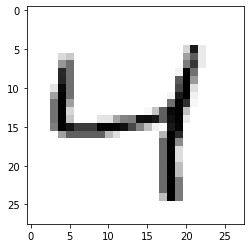

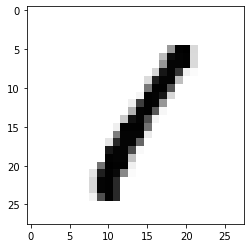

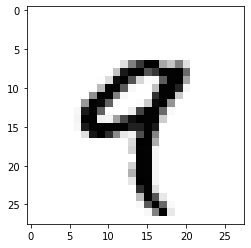

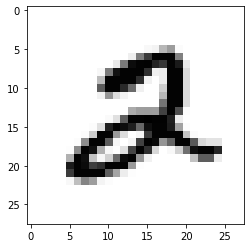

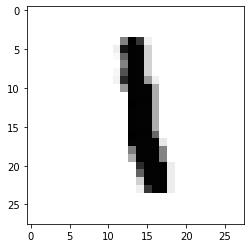

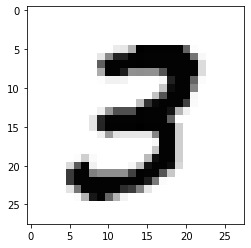

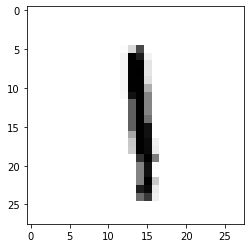

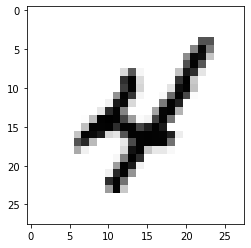

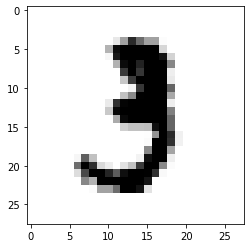

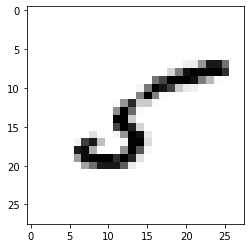

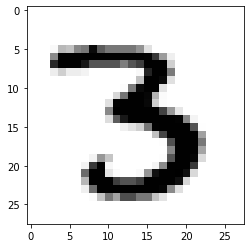

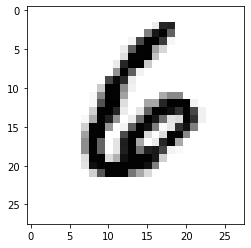

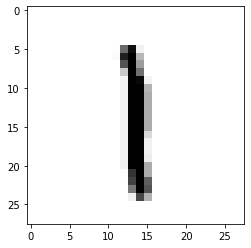

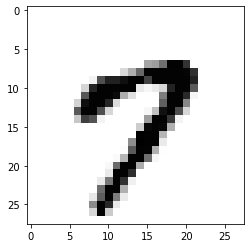

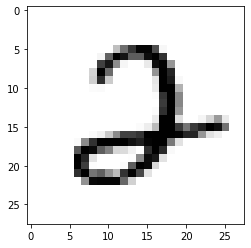

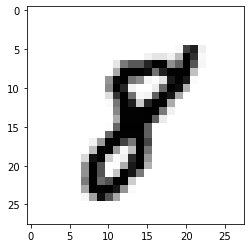

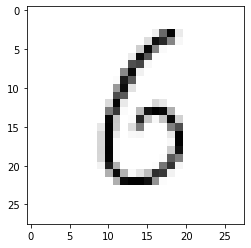

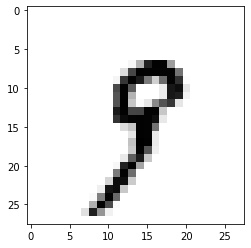

In [0]:
import matplotlib.pyplot as plt
for i in range(20):
    img = x_train[i].reshape((28, 28))
    plt.imshow(img, cmap="Greys")
    plt.show()